In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns  # another popular data visualization tool

%matplotlib inline

plt.style.use('fivethirtyeight')  # a popular data visualization theme

### 0 - Setup

Task: implement k-means clustering and use it to construct a multi-label classifier to determine the variery of wheat. For the dataset, we use ”seeds” dataset from the
machine Learning depository at UCI: https://archive.ics.uci.edu/ml/datasets/seeds

Dataset Description: From the website: ”... The examined group comprised kernels belonging to three different
varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for the experiment...”

There are 7 (continuous) features) F = {f1, . . . , f7} and a class label L (Kama: 1, Rosa: 2, Canadian: 3).

1. f1: area A
2. f2: perimeter P
3. f3: compactness C = 4πA/P2
4. f4: length of kernel,
5. f5: width of kernel,
6. f6: asymmetry coefficient
7. f7: length of kernel groove.
8. L: class (Kama: 1, Rosa: 2, Canadian: 3)

**Group: class L = 1 (negative) and L = 2 (positive)**

In [4]:
raw_seeds = pd.read_csv('seeds_dataset.csv', sep="\t", names=['f1','f2','f3','f4','f5','f6', 'f7', 'L'])
raw_seeds.head()

,f1,f2,f3,f4,f5,f6,f7,L
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [24]:
# drop rows with L=3 based on the group assignment
seeds = raw_seeds[raw_seeds['L']!=3].reset_index()
seeds.sample(5)

,index,f1,f2,f3,f4,f5,f6,f7,L
117,117,19.15,16.45,0.8890,6.245,3.815,3.084,6.185,2
103,103,19.18,16.63,0.8717,6.369,3.681,3.357,6.229,2
44,44,15.11,14.54,0.8986,5.579,3.462,3.128,5.180,1
67,67,14.01,14.29,0.8625,5.609,3.158,2.217,5.132,1
76,76,17.32,15.91,0.8599,6.064,3.403,3.824,5.922,2


In [25]:
# prep data
X = seeds.loc[:,'f1':'f7'].copy().to_numpy()
y = seeds.loc[:, 'L'].copy().to_numpy()

In [46]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

### 1 - Support Vector Machines

#### 1.1 Linear Kernal SVM

Linear Kernal SVM Confusion Matrix: 
 [[31  4]
 [ 3 32]]

Linear Kernal SVM Accuracy: 0.9


c:\Users\Nigel\anaconda3\envs\cs677\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(80.45200000000001, 0.5, 'predicted label')

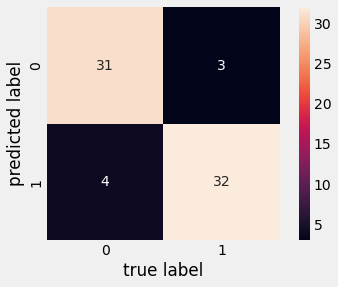

In [59]:
# Fit model to data
c = 10 # for margin
model = LinearSVC(C=c,loss="hinge")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Confusion Matrix
linearsvm_mat = confusion_matrix(y_test, y_pred)
print("Linear Kernal SVM Confusion Matrix: \n", linearsvm_mat)

# Accuracy
linearsvm_acc = accuracy_score(y_test, y_pred)
print("\nLinear Kernal SVM Accuracy:", round(linearsvm_acc,2))

sns.heatmap(linearsvm_mat.T,square=True, annot=True, fmt = 'd', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')



In [60]:
# calculate metrics

# linear SVM
linearsvm_tn = linearsvm_mat[0][0]
linearsvm_fn = linearsvm_mat[1][0]
linearsvm_tp = linearsvm_mat[1][1]
linearsvm_fp = linearsvm_mat[1][0]
linearsvm_tpr = linearsvm_tp / (linearsvm_tp + linearsvm_fn)
linearsvm_tnr = linearsvm_tn / (linearsvm_tn + linearsvm_fp)

#### 1.2 Gaussian Kernal SVM

Gaussian Kernal SVM Confusion Matrix: 
 [[31  4]
 [ 2 33]]

Gaussian Kernal SVM Accuracy: 0.91


Text(80.45200000000001, 0.5, 'predicted label')

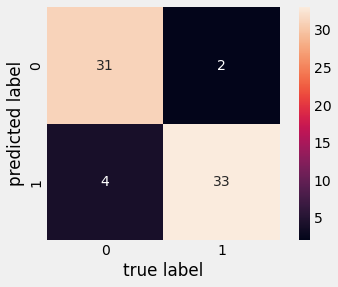

In [61]:
# Fit model to data
c = 10 # for margin
model = svm.SVC(kernel="rbf", gamma=0.7, C=c)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Confusion Matrix
gaussiansvm_mat = confusion_matrix(y_test, y_pred)
print("Gaussian Kernal SVM Confusion Matrix: \n", gaussiansvm_mat)

# Accuracy
gaussiansvm_acc = accuracy_score(y_test, y_pred)
print("\nGaussian Kernal SVM Accuracy:", round(gaussiansvm_acc,2))

sns.heatmap(gaussiansvm_mat.T,square=True, annot=True, fmt = 'd', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')



In [62]:
# calculate metrics

# gaussian SVM
gaussiansvm_tn = gaussiansvm_mat[0][0]
gaussiansvm_fn = gaussiansvm_mat[1][0]
gaussiansvm_tp = gaussiansvm_mat[1][1]
gaussiansvm_fp = gaussiansvm_mat[1][0]
gaussiansvm_tpr = gaussiansvm_tp / (gaussiansvm_tp + gaussiansvm_fn)
gaussiansvm_tnr = gaussiansvm_tn / (gaussiansvm_tn + gaussiansvm_fp)

#### 1.3 Third Degree Polynomial Kernal SVM

Third Degree Polynomial Kernal SVM Confusion Matrix: 
 [[32  3]
 [ 4 31]]

Third Degree Polynomial Kernal SVM Accuracy: 0.9


Text(80.45200000000001, 0.5, 'predicted label')

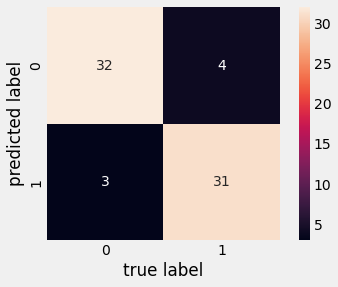

In [63]:
# Fit model to data
c = 10 # for margin
model = svm.SVC(kernel="poly", degree=3, gamma="auto", C=c)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Confusion Matrix
poly3svm_mat = confusion_matrix(y_test, y_pred)
print("Third Degree Polynomial Kernal SVM Confusion Matrix: \n", poly3svm_mat)

# Accuracy
poly3svm_acc = accuracy_score(y_test, y_pred)
print("\nThird Degree Polynomial Kernal SVM Accuracy:", round(poly3svm_acc,2))

sns.heatmap(poly3svm_mat.T,square=True, annot=True, fmt = 'd', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')



In [64]:
# calculate metrics

# polynomial (n=3) SVM
poly3svm_tn = poly3svm_mat[0][0]
poly3svm_fn = poly3svm_mat[1][0]
poly3svm_tp = poly3svm_mat[1][1]
poly3svm_fp = poly3svm_mat[1][0]
poly3svm_tpr = poly3svm_tp / (poly3svm_tp + poly3svm_fn)
poly3svm_tnr = poly3svm_tn / (poly3svm_tn + poly3svm_fp)

### 2 - Naive Bayes Classifier

Naive Bayes Confusion Matrix: 
 [[34  1]
 [ 4 31]]

Naive Bayes Accuracy: 0.93


Text(80.45200000000001, 0.5, 'predicted label')

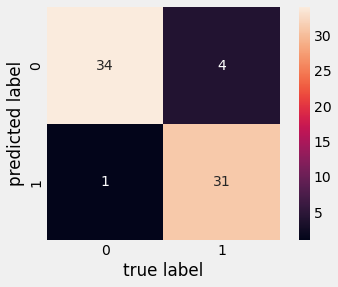

In [65]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Confusion Matrix
nb_mat = confusion_matrix(y_test, y_pred)
print("Naive Bayes Confusion Matrix: \n", nb_mat)

# Accuracy
nb_acc = accuracy_score(y_test, y_pred)
print("\nNaive Bayes Accuracy:", round(nb_acc,2))

sns.heatmap(nb_mat.T,square=True, annot=True, fmt = 'd', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [66]:
# calculate metrics 

# naive bayes
nb_tn = nb_mat[0][0]
nb_fn = nb_mat[1][0]
nb_tp = nb_mat[1][1]
nb_fp = nb_mat[1][0]
nb_tpr = nb_tp / (nb_tp + nb_fn)
nb_tnr = nb_tn / (nb_tn + nb_fp)

#### 2-2 Summary Table

In [67]:
summary = [['Linear SVM', nb_tp, nb_fp, nb_tn, nb_fn, nb_acc, nb_tpr, nb_tnr],
        ['Gaussian SVM', gaussiansvm_tp, gaussiansvm_fp, gaussiansvm_tn, gaussiansvm_fn, gaussiansvm_acc, gaussiansvm_tpr, gaussiansvm_tnr],
        ['Polynomial SVM (n=3)', poly3svm_tp, poly3svm_fp, poly3svm_tn, poly3svm_fn, poly3svm_acc, poly3svm_tpr, poly3svm_tnr],
        ['Naive Bayes', nb_tp, nb_fp, nb_tn, nb_fn, nb_acc, nb_tpr, nb_tnr],
        ]

summary_df = pd.DataFrame(summary, columns=['Model',' TP','FP','TN','FN','Accuracy','TPR','TNR'])
summary_df.head()

,Model,TP,FP,TN,FN,Accuracy,TPR,TNR
0,Linear SVM,31,4,34,4,0.928571,0.885714,0.894737
1,Gaussian SVM,33,2,31,2,0.914286,0.942857,0.939394
2,Polynomial SVM (n=3),31,4,32,4,0.900000,0.885714,0.888889
3,Naive Bayes,31,4,34,4,0.928571,0.885714,0.894737


**Discussion**: Based on these results, the Linear SVM and Naive Bayes models produce the highest accuracy. Interestingly, they have the exact same true positive and true negative rates. Despite not having the highest accuracy score, the Gaussian SVM model may be the better model to use because it has the highest true positive and true negative scores while being close to the Linear SVM and Naive Bayes models in terms of accuracy.

### 3 k-Means Clustering

In [70]:
# check unique values in target variable
raw_seeds.L.unique()

array([1, 2, 3], dtype=int64)

In [71]:
# prep data
X = raw_seeds.loc[:,'f1':'f7'].copy().to_numpy()
y = raw_seeds.loc[:, 'L'].copy().to_numpy()

In [72]:
def create_knee_plot(X, max_k):
  sse = []
  for i in range(1,max_k+1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
  plt.plot(range(1,max_k+1), sse, '-b')
  plt.xlabel('k')
  plt.ylabel('Inertia (SSE)')
  plt.title('Knee Plot')

c:\Users\Nigel\anaconda3\envs\cs677\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


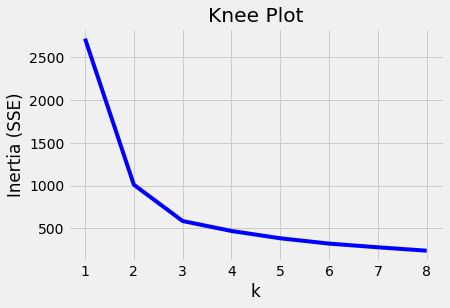

In [73]:
create_knee_plot(X,8)

The best *k* seems to be *k*=3.

#### 3-2 K-Means Clustering (Optimal *k*)

In [84]:
raw_seeds.head()

,f1,f2,f3,f4,f5,f6,f7,L
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [112]:
# select two features at random
import random

seq = list(range(0,X.shape[1])) # numeric list representing the index of each feature

f = random.sample(seq,2) # object containing two randomly selected feature indices 

Text(0, 0.5, 'f = 2')

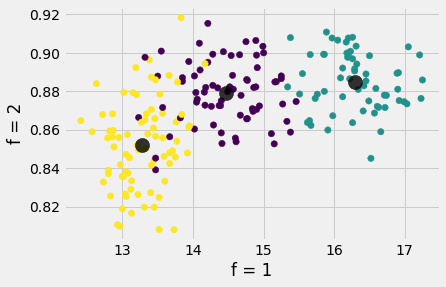

In [138]:
kmeans = KMeans(3, random_state=0) # optimal k
labels = kmeans.fit(X).predict(X)
#plot the clusters
plt.scatter(X[:, f[0]], X[:, f[1]], c=labels, s=40, cmap='viridis')

#plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, f[0]], centers[:,f[1]], c='black', s=200, alpha=0.8)
plt.xlabel('f = {}'.format(f[0]))
plt.ylabel('f = {}'.format(f[1]))

**Interesting Pattern**: There is a clearer separation between class 2 and class 3 than between class 1 and class 2, with these two features.

### 3-3 Apply cluster labels

In [145]:
clusters = pd.Series(labels)
clusters.unique()

array([0, 2, 1])

In [170]:
centers[0].flatten()

array([14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
        2.64893333,  5.19231944])

In [146]:
true_label = raw_seeds['L']

In [184]:
kmeans_df = pd.concat([clusters,true_label], axis=1).rename(columns={0:'cluster','L':'class'})
kmeans_df['cnt'] = 1
k_means_df = kmeans_df.groupby(['cluster','class'])['cnt'].sum().reset_index()
k_means_df


,cluster,class,cnt
0,0,1,60
1,0,2,10
2,0,3,2
3,1,1,1
4,1,2,60
5,2,1,9
6,2,3,68


In [202]:
# cluster 0
print("\nAssigned Label: ", '1-Kama')
print("Centroid:", centers[0])

# cluster 1
print("\nAssigned Label: ", '2-Rosa')
print("Centroid:", centers[1])

# cluster 2
print("\nAssigned Label: ", '3-Canadian')
print("Centroid:", centers[2])



Assigned Label:  1-Kama
Centroid: [14.64847222 14.46041667  0.87916667  5.56377778  3.27790278  2.64893333
  5.19231944]

Assigned Label:  2-Rosa
Centroid: [18.72180328 16.29737705  0.88508689  6.20893443  3.72267213  3.60359016
  6.06609836]

Assigned Label:  3-Canadian
Centroid: [11.96441558 13.27480519  0.8522      5.22928571  2.87292208  4.75974026
  5.08851948]


#### 3-4 Multi-Label Classifier using Euclidean Distance

In [203]:
raw_seeds.head()

,f1,f2,f3,f4,f5,f6,f7,L
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [206]:
# calculate euclidean distances for centroids and for each observation and then compare the distances, and assign to clusters   

numpy.ndarray